# Statistical mechanics of money

The **Boltzmann-Gibbs (BG) distribution** is a fundamental concept in statistical mechanics, describing the equilibrium distribution of energy among particles in a closed system. This distribution can also be applied to economic models, where it characterizes the equilibrium distribution of money among agents. 

Mathematically, the BG distribution is expressed as:
$$
P(m) = \frac{1}{T} \exp\left(-\frac{m}{T}\right),
$$
where $P(m)$ represents the probability density for an agent to hold money $m$, and $T$ is the effective "temperature" of the system. In economic terms, $T$ is proportional to the average money per agent, defined as:
$$
T = \frac{M}{N},
$$
where $M$ is the total money in the system, and $N$ is the number of agents.

The BG distribution exhibits an exponential decay, implying that higher values of money are less probable. This behavior reflects the tendency of systems in statistical equilibrium to maximize entropy while conserving total resources. The emergence of the BG distribution relies on key assumptions, such as the conservation of money, random transactions between agents, and symmetry in exchange rules.

In the context of economic models, the BG distribution serves as a baseline for understanding the equilibrium states of systems with randomized money exchange. It allows for the analysis of deviations caused by additional dynamics, such as taxation, saving behavior, or asymmetries in transaction rules. In this project, we investigate how the BG distribution emerges in different scenarios and explore the conditions under which deviations occur, providing insights into the underlying mechanisms of statistical equilibrium.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Without Debt

This simulation models a closed economic system where agents exchange money without borrowing (no debt allowed). The total money $M$ in the system remains conserved across all transactions.

### Agent Initialization
- **Number of agents $N$:** Each agent starts with an equal share of the total money $\frac{M}{N}$.
- **Money conservation:** No new money is introduced, and no debt is allowed.

### Transaction Mechanisms
The type of transaction is controlled by the `transaction_type` parameter:
1. **Constant:** A fixed amount of 1 unit is exchanged between two agents.
2. **Fraction of Pair's Average:** A random fraction of the average money of the pair $\frac{m_i + m_j}{2}$ is exchanged.
   $$
   \Delta = r \cdot \frac{m_i + m_j}{2}, \quad r \sim U(0, 1)
   $$
3. **Fraction of System Average:** A random fraction of the system-wide average money $\langle m \rangle$ is exchanged.
   $$
   \Delta = r \cdot \langle m \rangle, \quad r \sim U(0, 1)
   $$

### Conservation of Money
- For each transaction:
  $$
  m_i' = m_i - \Delta, \quad m_j' = m_j + \Delta
  $$
  where $m_i$ and $m_j$ are the money held by agents $i$ and $j$, respectively, before the transaction.

- Transactions only occur if $m_i \geq \Delta$. Otherwise, they are skipped.


In [14]:
def simulate_no_debt(N=500, M=5e5, steps=4e5, transaction_type='constant'):
    """
    Simulation without debt.
    N: number of agents
    M: total money
    steps: number of transactions
    transaction_type: 'constant' (exchange of 1 unit), 
                      'fraction_pair' (exchange of a random fraction of the average money of the pair),
                      'fraction_system' (exchange of a random fraction of the system-wide average money)
    """
    N = int(N)
    steps = int(steps)
    
    # Initialization: all agents start with equal amounts of money
    agents = np.ones(N) * M / N
    
    for t in range(steps):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        if i == j:
            continue
        
        if transaction_type == 'constant':
            delta = 1
        elif transaction_type == 'fraction_pair':
            mean_pair = (agents[i] + agents[j]) / 2
            delta = np.random.rand() * mean_pair
        elif transaction_type == 'fraction_system':
            mean_system = np.mean(agents)
            delta = np.random.rand() * mean_system
        else:
            delta = 1
        
        # Agent i pays agent j
        if agents[i] >= delta:
            agents[i] -= delta
            agents[j] += delta
        # If agent i doesn't have enough, skip the transaction
    
    return agents


# Simulation Results: Final Distribution Without Debt

### Boltzmann-Gibbs Distribution
The stationary distribution of money, according to the Boltzmann-Gibbs law, is given by:
$$
P(m) = \frac{1}{T} \exp\left(-\frac{m}{T}\right)
$$
where:
- $P(m)$ is the probability density for money $m$.
- $T$ is the system's "temperature," defined as the mean money per agent:
  $$
  T = \langle m \rangle = \frac{M}{N}.
  $$

### Steps
1. **Simulation**:
   - Use the `simulate_no_debt` function to model the system for $N=500$ agents, $M=5 \times 10^5$ total money, and `transaction_type='fraction_system'`.
   - The results are stored in `final_agents_no_debt`.

3. **Boltzmann-Gibbs Fit**:
   - Fit the histogram with the theoretical Boltzmann-Gibbs law using $T = \langle m \rangle$.

4. **Log-Log Plot**:
   - Transform the data to a logarithmic scale:
     $$
     \log(P(m)) = -\frac{m}{T} + \log\left(\frac{1}{T}\right).
     $$
   - Plot the transformed data and fit it against the logarithmic form of the Boltzmann-Gibbs law.

In [15]:
# Simulation without debt
N = 500
M = 5e5
final_agents_no_debt = simulate_no_debt(N=N, M=M, steps=5e5, transaction_type='fraction_system')
money_dist_no_debt, bins_no_debt = np.histogram(final_agents_no_debt, bins=50, density=True)

# BG Fit: P(m) = (1/T) * exp(-m/T), T = mean
T_no_debt = np.mean(final_agents_no_debt)
m_centers_no_debt = 0.5 * (bins_no_debt[1:] + bins_no_debt[:-1])
fit_no_debt = (1 / T_no_debt) * np.exp(-m_centers_no_debt / T_no_debt)

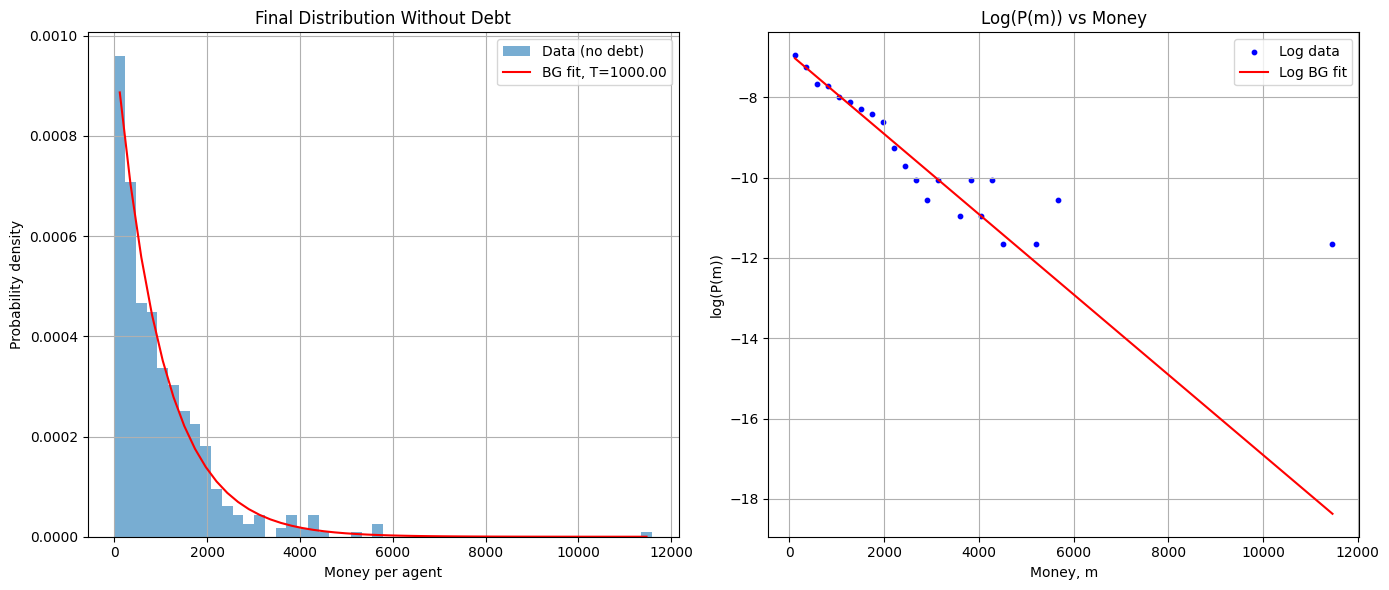

In [16]:
# Plot final distribution and log-log plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: original distribution
axs[0].hist(final_agents_no_debt, bins=50, density=True, alpha=0.6, label='Data (no debt)')
axs[0].plot(m_centers_no_debt, fit_no_debt, 'r-', label=f'BG fit, T={T_no_debt:.2f}')
axs[0].set_title("Final Distribution Without Debt")
axs[0].set_xlabel("Money per agent")
axs[0].set_ylabel("Probability density")
axs[0].legend()
axs[0].grid(True)

# Second subplot: log(P(m))
log_prob = np.log(money_dist_no_debt[money_dist_no_debt > 0])  # Avoid log(0)
log_m_centers = m_centers_no_debt[money_dist_no_debt > 0]      # Same dimensions as log_prob

# This log-log plot checks the consistency of the data with the Boltzmann-Gibbs distribution.
# Pay attention to potential deviations near the boundaries, which could arise due to:
# - Limited statistics at extreme values of money.
# - Model-specific effects, particularly in regions with low population density.
# These deviations do not invalidate the overall exponential trend but should be noted in the analysis.

axs[1].scatter(log_m_centers, log_prob, label='Log data', color='blue', s=10)
axs[1].plot(m_centers_no_debt, np.log(fit_no_debt), 'r-', label='Log BG fit')
axs[1].set_title("Log(P(m)) vs Money")
axs[1].set_xlabel("Money, m")
axs[1].set_ylabel("log(P(m))")
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()

In [17]:
final_agents_no_debt = simulate_no_debt(N=500, M=5e5, steps=5e5, transaction_type='fraction_system')
counts, bin_edges = np.histogram(final_agents_no_debt, bins=50, density=True)
bin_width = bin_edges[1] - bin_edges[0]
total_probability = np.sum(counts * bin_width)

print("Probabilities sum (~1):", total_probability)

Probabilities sum (~1): 1.0


# Entropy Evolution Over Time

The **entropy** of the money distribution evolves over time in a system without debt. Entropy measures the level of disorder or randomness in the system and is a key indicator of equilibrium.

### Entropy Definition
The entropy of the system is defined as: $ S = -\sum_{i} p_i \ln(p_i), $
where:
- $p_i$ is the probability density for money in bin i,
- $S$ increases as the system becomes more disordered.

The rate at which entropy increases depends on the transaction rule:
- For the **constant exchange rule**, mixing is much slower, and it takes significantly longer for the system to approach equilibrium.
- For the **fractional system exchange rule**, mixing is more efficient, allowing the system to reach equilibrium and maximum entropy more quickly.

This behavior reflects the link between the efficiency of redistribution and the time required for the system to achieve statistical equilibrium.

### Key Observations
- The saturation of entropy implies the system has reached **statistical equilibrium**.
- The initial rapid increase reflects the redistribution of money among agents starting from a highly ordered state (equal distribution).

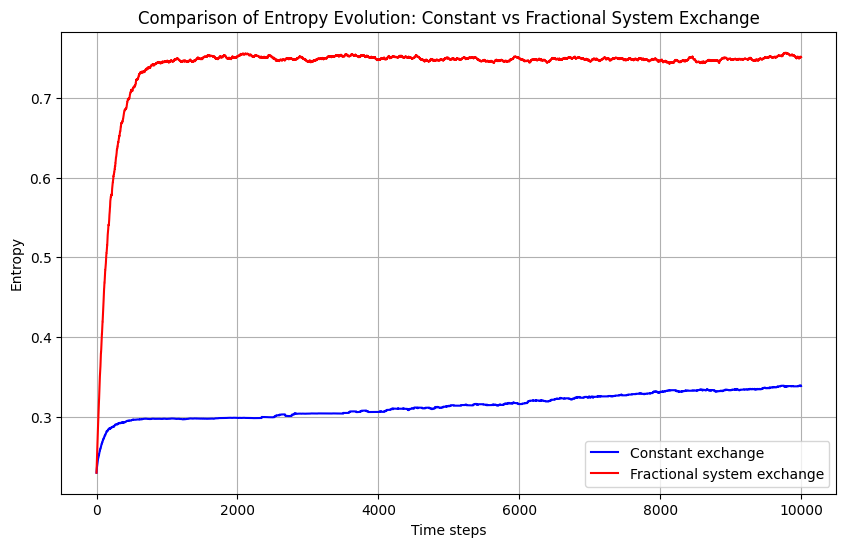

In [18]:
def simulate_entropy(N=500, M=5e5, steps=2000, transaction_type='constant', bins=500, max_money=5000):
    """
    Simulate the evolution of entropy with different transaction types.
    
    Parameters:
    N : int
        Number of agents.
    M : float
        Total money in the system.
    steps : int
        Number of time steps.
    transaction_type : str
        Type of transaction ('constant', 'fraction_pair', 'fraction_system').
    bins : int
        Number of bins for the histogram.
    max_money : int
        Range for the histogram to compute the distribution.
        
    Returns:
    time : np.ndarray
        Time steps array.
    S_values : list
        Entropy values at each time step.
    """
    # Initialize agents with equal distribution of money
    agents = np.ones(N) * M / N

    # Compute initial entropy
    hist, _ = np.histogram(agents, bins=bins, range=(0, max_money), density=True)
    S_values = [-np.sum(hist[hist > 0] * np.log(hist[hist > 0]))]

    # Simulation loop
    for t in range(1, steps + 1):
        # Select two random agents
        i, j = np.random.choice(N, 2, replace=False)
        
        # Determine transaction amount based on type
        if transaction_type == 'constant':
            delta = 1
        elif transaction_type == 'fraction_pair':
            mean_pair = (agents[i] + agents[j]) / 2
            delta = np.random.rand() * mean_pair
        elif transaction_type == 'fraction_system':
            mean_system = np.mean(agents)
            delta = np.random.rand() * mean_system
        else:
            raise ValueError("Invalid transaction type.")

        # Perform the transaction if agent i has enough money
        if agents[i] >= delta:
            agents[i] -= delta
            agents[j] += delta
        
        # Compute entropy at each step
        hist, _ = np.histogram(agents, bins=bins, range=(0, max_money), density=True)
        S_values.append(-np.sum(hist[hist > 0] * np.log(hist[hist > 0])))

    time = np.arange(0, steps + 1)
    return time, S_values

# Parameters
N = 500
M = 5e5
steps = 10000
bins = 500
max_money = 5000

# Simulate entropy evolution for 'constant' and 'fraction_system'
time_constant, S_values_constant = simulate_entropy(N=N, M=M, steps=steps, transaction_type='constant', bins=bins, max_money=max_money)
time_fraction_system, S_values_fraction_system = simulate_entropy(N=N, M=M, steps=steps, transaction_type='fraction_system', bins=bins, max_money=max_money)

# Plot comparison of entropy evolution
plt.figure(figsize=(10, 6))
plt.plot(time_constant, S_values_constant, label="Constant exchange", color='blue')
plt.plot(time_fraction_system, S_values_fraction_system, label="Fractional system exchange", color='red')
plt.title("Comparison of Entropy Evolution: Constant vs Fractional System Exchange")
plt.xlabel("Time steps")
plt.ylabel("Entropy")
plt.legend()
plt.grid(True)
plt.show()

# Simulation with Debt

This simulation extends the basic money exchange model by allowing agents to incur debt up to a maximum limit, $-md$. This modification introduces a new dynamic in the system, where agents can spend more money than they have, enabling different outcomes in the distribution of wealth.

### Key Parameters
1. **Maximum debt ($md$):**
   - Each agent can go into debt up to $-md$.
2. **Transaction types:**
   - **Constant:** Fixed amount of 1 unit exchanged.
   - **Fraction of Pair's Average:** A random fraction of the average money of the pair, $ \Delta = r \cdot \frac{m_i + m_j}{2}, \, r \sim U(0, 1)$.
   - **Fraction of System Average:** A random fraction of the system-wide average money, $ \Delta = r \cdot \langle m \rangle, \, r \sim U(0, 1)$.

### Transaction Rules
1. A transaction occurs between two random agents $i$ and $j$.
2. If agent $i$ has enough money, the transaction proceeds as:
   $$
   m_i' = m_i - \Delta, \quad m_j' = m_j + \Delta.
   $$
3. If agent $i$ does not have enough money, they can still complete the transaction provided their new balance does not fall below $-md$:
   $$
   m_i' \geq -md.
   $$

### Conservation of Total Money
Despite the introduction of debt, the **total money in the system remains conserved**:
$$
\sum_{i=1}^N m_i = M.
$$

### Observations
- Introducing debt can result in a broader distribution of money, as agents can temporarily "overspend."
- The maximum debt $md$ acts as a control parameter for the system's behavior and wealth inequality.


In [19]:
def simulate_with_debt(N=500, M=5e5, steps=4e5, md=800, transaction_type='constant'):
    """
    Simulation with a maximum debt limit (md).
    """
    N = int(N)
    steps = int(steps)
    agents = np.ones(N) * M / N  # Initialize agents with equal money

    for t in range(steps):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        if i == j:
            continue

        if transaction_type == 'constant':
            delta = 1
        elif transaction_type == 'fraction_pair':
            mean_pair = (agents[i] + agents[j]) / 2
            delta = np.random.rand() * mean_pair
        elif transaction_type == 'fraction_system':
            mean_system = np.mean(agents)
            delta = np.random.rand() * mean_system
        else:
            delta = 1

        # Agent i pays agent j, can go into debt up to -md
        if agents[i] - delta >= -md:
            agents[i] -= delta
            agents[j] += delta
            
    return agents

# Final Distribution with Debt

This simulation examines the final stationary distribution of money among agents **with debt**. The inclusion of debt introduces a new dynamic to the system, allowing agents to temporarily have negative balances up to a maximum debt limit, $-md$.

### Key Parameters
- **Maximum debt ($md$):** The maximum negative balance an agent can hold.
- **Temperature correction ($T$):**
  - When debt is allowed, the effective "temperature" of the system increases:
    $$
    T = \frac{M}{N} + md,
    $$
    where:
    - $M$ is the total money,
    - $N$ is the number of agents,
    - $md$ is the maximum debt limit.

### Boltzmann-Gibbs Distribution
The stationary distribution with debt still follows the Boltzmann-Gibbs form:
$$
P(m) = \frac{1}{T} \exp\left(-\frac{m}{T}\right),
$$
where $T$ is the corrected temperature.

### Steps
1. **Simulation**:
   - Agents exchange money using the `simulate_with_debt` function, with $N=500$, $M=5 \times 10^5$, $steps=4 \times 10^5$, and $md=800$.
   - Transactions allow agents to go into debt, provided their balance does not fall below $-md$.

2. **Fit**:
   - Fit the histogram using the Boltzmann-Gibbs law, with the corrected temperature $T = \frac{M}{N} + md$.

3. **Visualization**:
   - The histogram represents the simulated distribution of money.
   - The red curve shows the Boltzmann-Gibbs fit for the given temperature $T$.

### Observations
- The Boltzmann-Gibbs fit remains valid, demonstrating that the system reaches a new equilibrium determined by the effective temperature.

In [20]:
# Simulation with debt
md = 800
final_agents_debt = simulate_with_debt(N=N, M=M, steps=4e5, md=md, transaction_type='fraction_system')
money_dist_debt, bins_debt = np.histogram(final_agents_debt, bins=50, density=True)

m_centers_debt = 0.5 * (bins_debt[1:] + bins_debt[:-1])

# Calculate the corrected temperature with debt
T_debt = M / N + md
# Boltzmann-Gibbs Fit
fit_debt = (1 / T_debt) * np.exp(-m_centers_debt / T_debt)

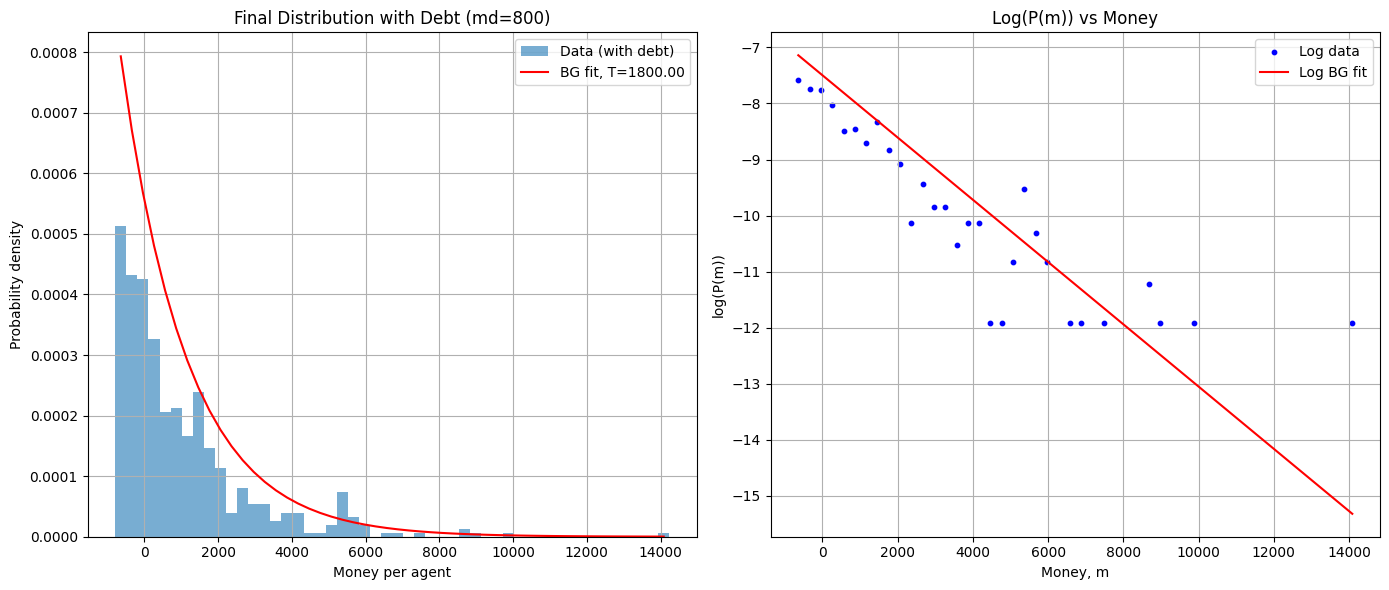

In [21]:
# Plot final distribution and log-log plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: original distribution
axs[0].hist(final_agents_debt, bins=50, density=True, alpha=0.6, label='Data (with debt)')
axs[0].plot(m_centers_debt, fit_debt, 'r-', label=f'BG fit, T=%.2f' % T_debt)
axs[0].set_title("Final Distribution with Debt (md=%d)" % md)
axs[0].set_xlabel("Money per agent")
axs[0].set_ylabel("Probability density")
axs[0].legend()
axs[0].grid(True)

# Second subplot: log(P(m))
log_prob = np.log(money_dist_debt[money_dist_debt > 0])  # Avoid log(0)
log_m_centers = m_centers_debt[money_dist_debt > 0]      # Same dimensions as log_prob

# This log-log plot checks the consistency of the data with the Boltzmann-Gibbs distribution.
# Pay attention to potential deviations near the boundaries, which could arise due to:
# - Limited statistics at extreme values of money.
# - Model-specific effects, particularly in regions with low population density.
# These deviations do not invalidate the overall exponential trend but should be noted in the analysis.

axs[1].scatter(log_m_centers, log_prob, label='Log data', color='blue', s=10)
axs[1].plot(m_centers_debt, np.log(fit_debt), 'r-', label='Log BG fit')
axs[1].set_title("Log(P(m)) vs Money")
axs[1].set_xlabel("Money, m")
axs[1].set_ylabel("log(P(m))")
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()

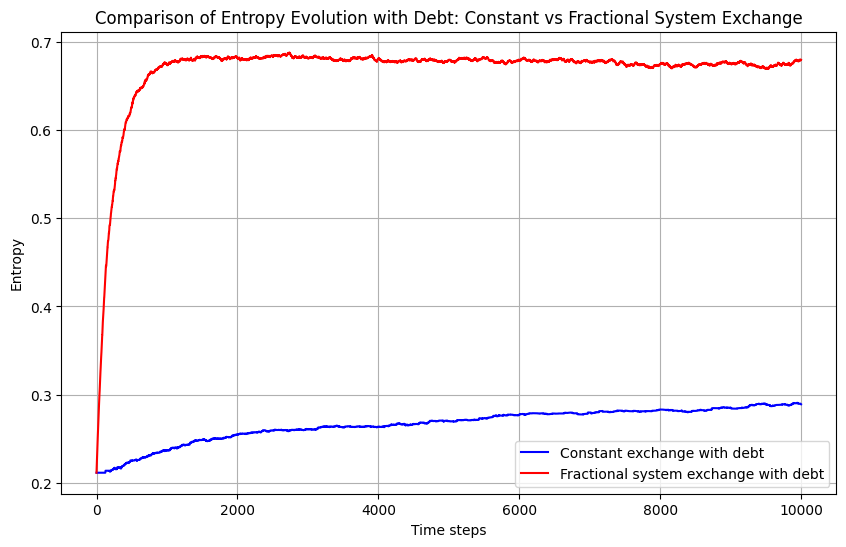

In [22]:
def simulate_entropy_with_debt(N=500, M=5e5, steps=2000, md=800, transaction_type='constant', bins=500, max_money=5000):
    """
    Simulate the evolution of entropy with a maximum debt limit (md).
    
    Parameters:
    N : int
        Number of agents.
    M : float
        Total money in the system.
    steps : int
        Number of time steps.
    md : float
        Maximum debt allowed.
    transaction_type : str
        Type of transaction ('constant', 'fraction_pair', 'fraction_system').
    bins : int
        Number of bins for the histogram.
    max_money : int
        Range for the histogram to compute the distribution.
        
    Returns:
    time : np.ndarray
        Time steps array.
    S_values : list
        Entropy values at each time step.
    """
    # Initialize agents with equal distribution of money
    agents = np.ones(N) * M / N

    # Compute initial entropy
    hist, _ = np.histogram(agents, bins=bins, range=(-md, max_money), density=True)
    S_values = [-np.sum(hist[hist > 0] * np.log(hist[hist > 0]))]

    # Simulation loop
    for t in range(1, steps + 1):
        # Select two random agents
        i, j = np.random.choice(N, 2, replace=False)
        
        # Determine transaction amount based on type
        if transaction_type == 'constant':
            delta = 1
        elif transaction_type == 'fraction_pair':
            mean_pair = (agents[i] + agents[j]) / 2
            delta = np.random.rand() * mean_pair
        elif transaction_type == 'fraction_system':
            mean_system = np.mean(agents)
            delta = np.random.rand() * mean_system
        else:
            raise ValueError("Invalid transaction type.")

        # Perform the transaction, allowing debt up to -md
        if agents[i] - delta >= -md:
            agents[i] -= delta
            agents[j] += delta
        
        # Compute entropy at each step
        hist, _ = np.histogram(agents, bins=bins, range=(-md, max_money), density=True)
        S_values.append(-np.sum(hist[hist > 0] * np.log(hist[hist > 0])))

    time = np.arange(0, steps + 1)
    return time, S_values

N = 500
M = 5e5
steps = 10000
md = 800
bins = 500
max_money = 5000

# Simulate entropy evolution for 'constant' and 'fraction_system' with debt
time_constant_debt, S_values_constant_debt = simulate_entropy_with_debt(
    N=N, M=M, steps=steps, md=md, transaction_type='constant', bins=bins, max_money=max_money
)
time_fraction_system_debt, S_values_fraction_system_debt = simulate_entropy_with_debt(
    N=N, M=M, steps=steps, md=md, transaction_type='fraction_system', bins=bins, max_money=max_money
)

# Plot comparison of entropy evolution with debt
plt.figure(figsize=(10, 6))
plt.plot(time_constant_debt, S_values_constant_debt, label="Constant exchange with debt", color='blue')
plt.plot(time_fraction_system_debt, S_values_fraction_system_debt, label="Fractional system exchange with debt", color='red')
plt.title("Comparison of Entropy Evolution with Debt: Constant vs Fractional System Exchange")
plt.xlabel("Time steps")
plt.ylabel("Entropy")
plt.legend()
plt.grid(True)
plt.show()

# Simulation with Taxes and Subsidies

This simulation incorporates **taxes and subsidies** into the economic model. Taxes are levied proportionally on each transaction, and the total tax revenue is redistributed equally among all agents as subsidies at regular intervals.

### Key Parameters
1. **Tax rate ($\tau$):**
   - A fixed proportion $\tau$ (e.g., $\tau=0.4$ for a 40% tax) is applied to each transaction.
   - The tax amount is $ \text{tax} = \tau \cdot \Delta m $, where $\Delta m$ is the money exchanged.

2. **Subsidies:**
   - Taxes collected are redistributed equally among all agents after every 100 steps.

### Steps
1. **Taxes:** 
   - Taxes are subtracted from the payer's balance during each transaction.
   - The transaction occurs only if the payer has sufficient funds for both the transfer and the tax:
     $$
     m_i' = m_i - (\Delta m + \text{tax}), \quad m_j' = m_j + \Delta m,
     $$
     where $m_i' \geq 0$ is enforced.

2. **Subsidies:**
   - Collected taxes are redistributed equally to all agents:
     $$
     \text{Subsidy per agent} = \frac{\text{Total Taxes Collected}}{N}.
     $$

3. **Conservation of Total Money:**
   - The total money in the system remains constant:
     $$
     \sum_{i=1}^N m_i = M.
     $$

## Observations
- Taxes reduce the immediate money available to agents but are redistributed evenly, creating a new equilibrium.
- The taxation rate $\tau$ acts as a control parameter for the system's behavior, influencing the final distribution of money.


In [23]:
def simulate_with_taxes(N=500, M=5e5, steps=1e6, tau=0.4, transaction_type='constant'):
    """
    Simulation with taxes and subsidies, following the correct model with balance constraints.
    """
    N = int(N)
    steps = int(steps)
    agents = np.ones(N) * M / N  # Initialization: all agents start with the same amount of money
    collected_taxes = 0          # Taxes accumulated during transactions

    for t in range(steps):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        if i == j:
            continue

        # Determine the amount to transfer
        if transaction_type == 'constant':
            delta = 1
        elif transaction_type == 'fraction_pair':
            mean_pair = (agents[i] + agents[j]) / 2
            delta = np.random.rand() * mean_pair
        elif transaction_type == 'fraction_system':
            mean_system = np.mean(agents)
            delta = np.random.rand() * mean_system
        else:
            delta = 1

        # Calculate proportional tax
        tax = tau * delta

        # Apply the transaction with balance control
        if agents[i] >= delta + tax:
            agents[i] -= delta + tax
            agents[j] += delta
            collected_taxes += tax

        # Redistribute taxes every 100 steps
        if t % 100 == 0 and collected_taxes > 0:
            subsidy = collected_taxes / N
            agents += subsidy
            collected_taxes = 0

    return agents

# Stationary Distribution with Taxes and Subsidies

This section analyzes the stationary distribution of money in a system with **taxes and subsidies**. The results are compared to the Boltzmann-Gibbs (BG) distribution, considering the modifications introduced by taxation and redistribution.

### Key Concept
In this model:
$$
P(m) = \frac{1}{T} \exp\left(-\frac{m}{T}\right),
$$
where $T$ is the temperature, determined by the mean money per agent. With taxes, the effective temperature is reduced:
$$
T = \frac{M}{N} \cdot (1 - \tau),
$$
where:
- $M$: Total money in the system,
- $N$: Number of agents,
- $\tau$: Tax rate (fraction of money taken as tax).

### Simulation and Fit
1. **Simulation**:
   - Agents exchange money with a tax rate $\tau = 0.4$ applied to each transaction.
   - Taxes are redistributed uniformly as subsidies every 100 steps.

2. **Fit**:
   - The BG distribution is fitted using the theoretical temperature $T = \frac{M}{N} \cdot (1 - \tau)$.
   - The fit is used to verify whether the distribution retains an exponential form under taxation.

### Observations
- The taxation mechanism reduces the effective temperature, narrowing the distribution of money compared to a system without taxes.
- While the system often retains a Boltzmann-Gibbs-like behavior, the introduction of taxes and redistribution introduce slight deviations.
- The stationary distribution with taxes and subsidies aligns closely with the Boltzmann-Gibbs model, adjusted for the effective temperature $T = \frac{M}{N} \cdot (1 - \tau)$. Any discrepancies could arise from the dynamics of redistribution.


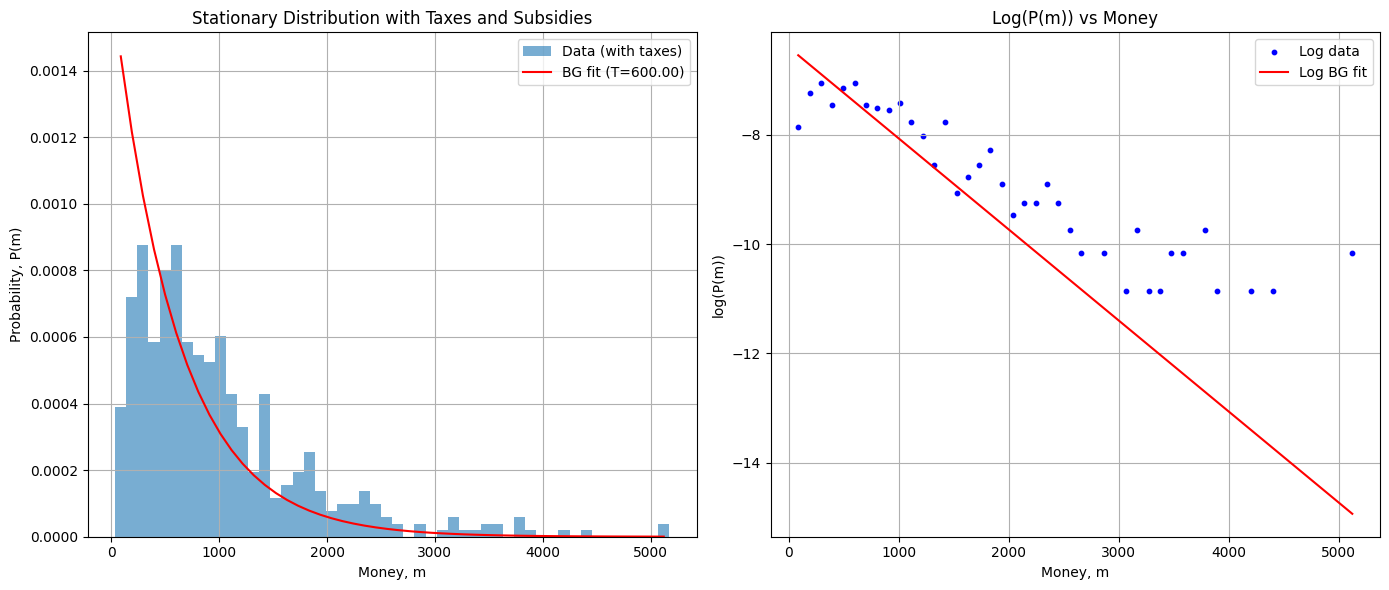

In [24]:
# Parameters
N = 500
M = 5e5
steps = 3e6
tau = 0.4  # Tax rate of 40%
transaction_type = 'fraction_system'

# Simulation with taxes
final_agents_taxes = simulate_with_taxes(N=N, M=M, steps=steps, tau=tau, transaction_type=transaction_type)

# Calculate the distribution
money_dist_taxes, bins_taxes = np.histogram(final_agents_taxes, bins=50, density=True)
m_centers_taxes = 0.5 * (bins_taxes[1:] + bins_taxes[:-1])

# Boltzmann-Gibbs Fit
T_taxes = (M / N) * (1 - tau)  # Theoretical temperature
fit_taxes = (1 / T_taxes) * np.exp(-m_centers_taxes / T_taxes)

# Plot final distribution and log-log plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: original distribution
axs[0].hist(final_agents_taxes, bins=50, density=True, alpha=0.6, label='Data (with taxes)')
axs[0].plot(m_centers_taxes, fit_taxes, 'r-', label=f'BG fit (T={T_taxes:.2f})')
axs[0].set_title("Stationary Distribution with Taxes and Subsidies")
axs[0].set_xlabel("Money, m")
axs[0].set_ylabel("Probability, P(m)")
axs[0].legend()
axs[0].grid(True)

# Second subplot: log(P(m))
log_prob = np.log(money_dist_taxes[money_dist_taxes > 0])  # Avoid log(0)
log_m_centers = m_centers_taxes[money_dist_taxes > 0]      # Same dimensions as log_prob

# This log-log plot checks the consistency of the data with the Boltzmann-Gibbs distribution.
# Pay attention to potential deviations near the boundaries, which could arise due to:
# - Limited statistics at extreme values of money.
# - Model-specific effects, particularly in regions with low population density.
# These deviations do not invalidate the overall exponential trend but should be noted in the analysis.

axs[1].scatter(log_m_centers, log_prob, label='Log data', color='blue', s=10)
axs[1].plot(m_centers_taxes, np.log(fit_taxes), 'r-', label='Log BG fit')
axs[1].set_title("Log(P(m)) vs Money")
axs[1].set_xlabel("Money, m")
axs[1].set_ylabel("log(P(m))")
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()

The **Boltzmann-Gibbs (BG) distribution** naturally emerges in a closed system with random transactions, confirming that money, when treated as a conserved quantity, follows dynamics similar to energy in physical systems.   
This study not only provides an innovative perspective on economic dynamics but also opens avenues for further exploration of **how other social and financial phenomena can be modeled using tools from statistical physics**. Moreover, it highlights the potential to inform economic decisions by leveraging more complex models, enabling a deeper understanding of inequality, policy impacts, and systemic behaviors in increasingly intricate economic systems.